In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import gmaps
from pytrends.request import TrendReq
from pprint import pprint
import string

# Import API key
from config import nyt_api_key
from config import gkey

## Generate Top Query List

In [ ]:
type_list = [#"Arts", 
             #"Automobiles", 
             #"Blogs", 
             #"Books", 
             "Business Day", 
             #"Education", 
             #"Fashion & Style", 
             #"Food", 
             #"Health", 
             #"Job Market", 
             #"Magazine", 
             #"membercenter", 
             #"Movies", 
             "Multimedia", 
             "N.Y.%20%2F%20Region", 
             "NYT Now",  
             #"Open", 
             #"Opinion", 
             #"Public Editor", 
             #"Real Estate", 
             #"Science", 
             #"Sports", 
             #"Style", 
             "Sunday Review", 
             #"T Magazine", 
             #"Technology", 
             #"The Upshot", 
             #"Theater", 
             #"Times Insider", 
             "Today’s Paper", 
             #"Travel", 
             "U.S.", 
             "World", 
             #"Your Money"
]

# Initialize empty list to hold description facets
facets = []

# Loop through each type
for type in type_list:
    # Starting URL for NYT Most Shared API Call - Facebook
    url = f"http://api.nytimes.com/svc/mostpopular/v2/mostshared/{type}/facebook/30.json?"
    query_url = f"{url}api-key={nyt_api_key}"
    response = requests.get(query_url).json()

    # Loop through the list of articles, remove common punctuation, and perform a split
    for result in range(len(response['results'])):
        text = response['results'][result]['org_facet']
        for facet in text:
            facets.append(facet.lower())
            #print(facets)



In [3]:
# Create DataFrame with the top 5 (by value count) queries
facet_df=pd.DataFrame(facets).rename(columns={0:"Number of Appearances"})
top_queries = pd.DataFrame(facet_df['Number of Appearances'].value_counts()).head(20)
top_queries_reset = top_queries.reset_index()
top_queries_rnm = top_queries_reset.rename(columns={"index":"Facet"})
top_queries_rnm

,Facet,Number of Appearances
0,islamic state in iraq and syria (isis),3
1,justice department,3
2,immigration and emigration,2
3,suits and litigation (civil),2
4,espionage and intelligence services,2
5,roman catholic church,2
6,frauds and swindling,2
7,democratic party,2
8,presidential election of 2016,2
9,education department (us),2


In [10]:
# Construct keyword list for Google Trends
query_list = top_queries_rnm["Facet"].head()
kw_list = ["2016 presidential election"]
# Configure Google Trends

pytrends = TrendReq(hl='en-US', tz=360)
# Add the keyword list in 
pytrends.build_payload(kw_list, cat=0, timeframe='2017-09-07 2018-09-07', geo='US',gprop='')
    
data_list = pytrends.interest_by_region(resolution='STATE')

data_list1 = data_list.loc[(data_list!=0).any(1)]
data_list1 = data_list1.reset_index()
data_list1['lat'] = ''
data_list1['lng'] = ''
data_list1

,geoName,2016 presidential election,lat,lng
0,Alabama,31,,
1,Alaska,52,,
2,Arizona,31,,
3,Arkansas,25,,
4,California,32,,
5,Colorado,38,,
6,Connecticut,35,,
7,Delaware,25,,
8,District of Columbia,100,,
9,Florida,26,,


In [11]:
lat = []
lng = []
for city in data_list1['geoName']:
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(city, gkey)
    geo_data = requests.get(target_url).json()
    lati = geo_data['results'][0]['geometry']['location']['lat']
    lngi = geo_data['results'][0]['geometry']['location']['lng']
    lat.append(lati)
    lng.append(lngi)

In [12]:
data_list1['lat'] = lat
data_list1['lng'] = lng
data_list1.head()

,geoName,2016 presidential election,lat,lng
0,Alabama,31,32.318231,-86.902298
1,Alaska,52,64.200841,-149.493673
2,Arizona,31,34.048928,-111.093731
3,Arkansas,25,35.201050,-91.831833
4,California,32,36.778261,-119.417932


In [13]:
locations = data_list1[['lat','lng']].astype(float)
query_request = data_list1['2016 presidential election'].astype(float)

In [14]:
gmaps.configure(api_key = gkey)

In [15]:
# Construct heat map for the query_request
fig = gmaps.figure(map_type="HYBRID")
heat_layer = gmaps.heatmap_layer(locations, weights=query_request,
                                dissipating=False, max_intensity=100, point_radius = 1)
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 1
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [16]:
pytrends.related_queries()

{'2016 presidential election': {'top':                                            query  value
  0             2016 presidential election results    100
  1                          2016 election results     97
  2                 2016 presidential election map     43
  3                              2016 election map     40
  4                  2016 us presidential election     32
  5                     2012 presidential election     22
  6        2016 presidential election popular vote     19
  7          2016 presidential election candidates     18
  8                       2016 election candidates     17
  9            2016 presidential election by state     17
  10          2016 presidential election by county     16
  11                    2017 presidential election     16
  12         california presidential election 2016     13
  13                                 2008 election     13
  14            2016 presidential election turnout     13
  15                    2018 presid

In [18]:
# Construct bar graph for the related queries
related_query = pytrends.related_queries()
related_query_df = related_query['2016 presidential election']['rising'].head(20)
related_query_df

,query,value
0,alabama senate race,12200
1,2018 presidential election,2050
2,puerto rico 2016 presidential election,900
3,alabama 2016 presidential election,650
4,puerto rico,600
5,puerto rico 2016 presidential election results,550
6,how much money was spent in the 2016 president...,300
7,2016 presidential election results by congress...,250
8,2017 presidential election,200
9,who won florida in the 2016 presidential election,190


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

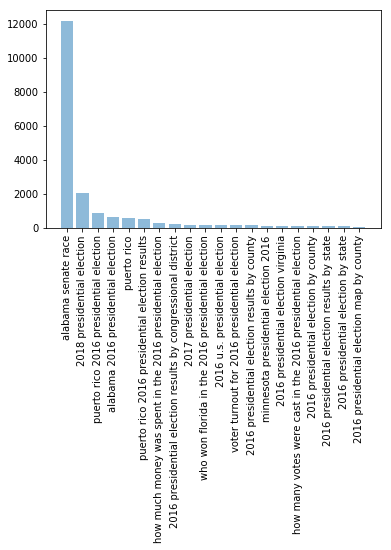

In [19]:
plt.bar(related_query_df['query'],related_query_df['value'],alpha=0.5, align="center")
plt.xticks(rotation=90)

In [20]:
# Display interest over time
overtime_interest = pytrends.interest_over_time()
overtime_interest.head(52)

,2016 presidential election,isPartial
date,,
2017-09-10,48,False
2017-09-17,48,False
2017-09-24,63,False
2017-10-01,48,False
2017-10-08,45,False
2017-10-15,51,False
2017-10-22,54,False
2017-10-29,55,False
2017-11-05,100,False


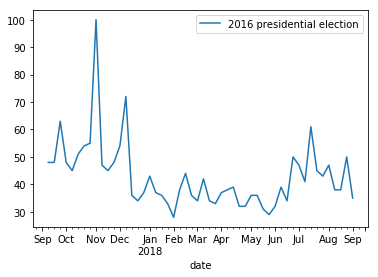

In [21]:
# Show trend line for given trend
lines  =  overtime_interest.plot.line()